In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv('data_fin.csv')

In [70]:
data.sample(10)

,author_type,link,floor,floors_count,rooms_count,total_meters,price_per_m2,price,underground,district
484,real_estate_agent,https://www.cian.ru/sale/flat/285436145/,5,25,2,110.60,285714,31600000,кунцевская,можайский
2259,real_estate_agent,https://www.cian.ru/sale/flat/279726677/,19,41,5,161.00,807453,130000000,цска,хорошевский
428,developer,https://www.cian.ru/sale/flat/282277665/,17,33,2,51.80,219520,11371136,перерва,люблино
640,unknown,https://www.cian.ru/sale/flat/274920741/,8,9,2,60.90,251952,15343912,румянцево,unknown
1770,developer,https://www.cian.ru/sale/flat/279637662/,2,21,2,43.28,285000,12334800,калитники,нижегородский
1734,developer,https://www.cian.ru/sale/flat/284858916/,4,26,1,26.86,825302,22167638,белорусская,пресненский
297,developer,https://www.cian.ru/sale/flat/285084323/,14,29,2,53.30,360000,19188000,кунцевская,фили-давыдково
114,real_estate_agent,https://www.cian.ru/sale/flat/275566339/,3,31,2,73.20,628415,46000000,давыдково,очаково-матвеевское
1479,real_estate_agent,https://www.cian.ru/sale/flat/285510123/,7,22,4,97.30,472764,46000000,раменки,раменки
1718,developer,https://www.cian.ru/sale/flat/284906814/,18,23,1,48.07,303719,14599820,варшавская,москворечье-сабурово


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 10 columns):
author_type     2416 non-null object
link            2416 non-null object
floor           2416 non-null int64
floors_count    2416 non-null int64
rooms_count     2416 non-null int64
total_meters    2416 non-null float64
price_per_m2    2416 non-null int64
price           2416 non-null int64
underground     2416 non-null object
district        2416 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 188.8+ KB


In [72]:
data.describe()

,floor,floors_count,rooms_count,total_meters,price_per_m2,price
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2.416000e+03
mean,10.737997,21.567467,2.360099,80.663825,5.405296e+05,5.193257e+07
std,11.158655,16.111555,0.898749,50.426194,7.313959e+05,6.960517e+07
min,1.000000,2.000000,1.000000,0.600000,1.250000e+05,3.400000e+06
25%,3.000000,9.000000,2.000000,47.600000,2.833002e+05,1.327980e+07
50%,7.000000,17.000000,2.000000,64.875000,4.275610e+05,2.690000e+07
75%,14.000000,26.000000,3.000000,97.025000,6.194422e+05,5.999925e+07
max,85.000000,97.000000,5.000000,441.000000,3.166667e+07,7.922100e+08


Добавим в таблицу к этажу квартиры; варианты — первый, последний, другой:

In [73]:
data.loc[data['floor'] == 1, 'floor_category'] = 'first'
data.loc[data['floor'] == data['floors_count'], 'floor_category'] = 'last'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'other'

In [74]:
data['floor_category'].value_counts()

other    2165
last      168
first      83
Name: floor_category, dtype: int64

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

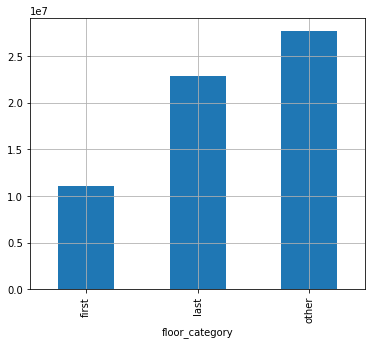

In [75]:
#Вычислим медианную цену в каждой категории
floor_median = data.groupby('floor_category')['price'].median()
floor_median.plot(x=floor_median.index, y=floor_median.values, kind='bar', grid=True, figsize=(6,5))


гистограмма показывает, что квартиры на первом или последнем этаже,очевидно, обычно продаются по более низкой цене, чем квартиры на других этажах. Большего всего в цене теряют квартиры на первом этаже.

In [76]:
#выделим все числовые признаки
df_numeric = data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)


['floor' 'floors_count' 'rooms_count' 'total_meters' 'price_per_m2'
 'price']


In [77]:
data[numeric_cols].corr()

,floor,floors_count,rooms_count,total_meters,price_per_m2,price
floor,1.000000,0.755440,0.012302,0.094777,0.008129,0.022209
floors_count,0.755440,1.000000,-0.019694,0.034659,-0.010884,-0.061161
rooms_count,0.012302,-0.019694,1.000000,0.786436,0.148679,0.547895
total_meters,0.094777,0.034659,0.786436,1.000000,0.225989,0.790462
price_per_m2,0.008129,-0.010884,0.148679,0.225989,1.000000,0.417168
price,0.022209,-0.061161,0.547895,0.790462,0.417168,1.000000


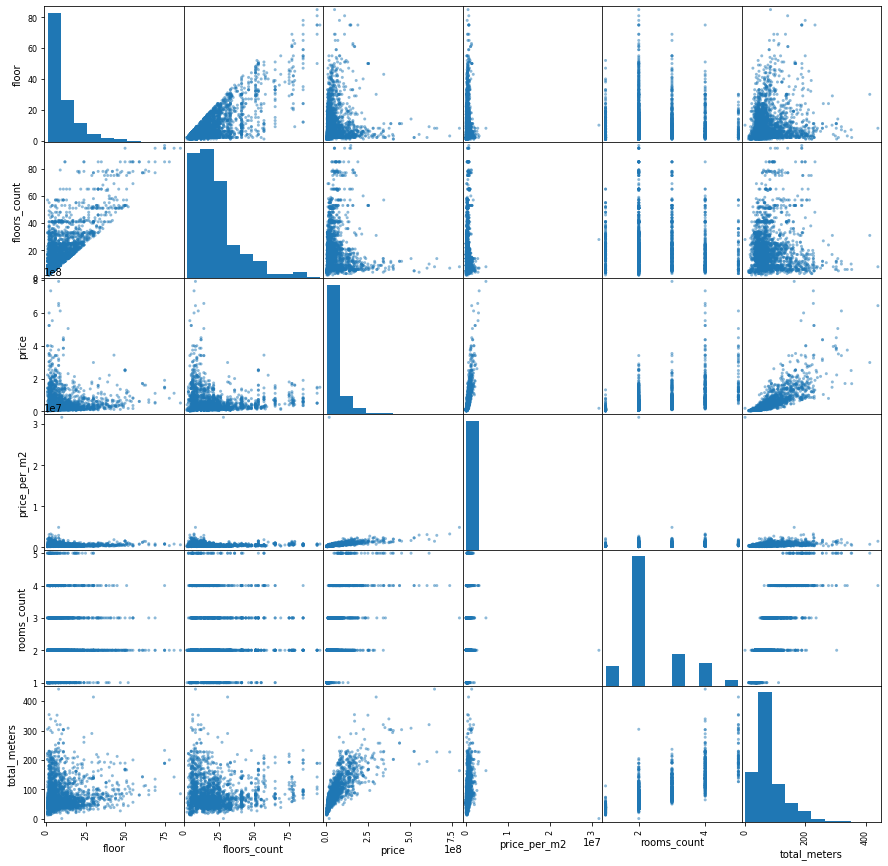

In [78]:
pd.plotting.scatter_matrix(data.pivot_table(index=data.index, values=numeric_cols), figsize=(15, 15));

Сильнее всего цена на квартиру зависит от общей площади и этажности.

**Отчеты:**

Построим график распределения цены, а также найдем среднюю и медианную цены и стандартное отклонение.

Диапазон цен: 3400000 - 792210000
Средняя цена: 51932574
Median price: 26900000
Ст.отклонение: 69605168


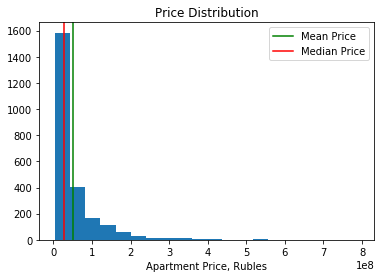

In [80]:
mean_price = int(data['price'].mean())
median_price = int(data['price'].median())

std = int(data['price'].std())

min_price = int(data['price'].min())
max_price = int(data['price'].max())

print(f'Диапазон цен: {min_price} - {max_price}')
print(f'Средняя цена: {mean_price}\nMedian price: {median_price}')
print(f'Ст.отклонение: {std}')

plt.hist(data['price'], bins=20)
plt.axvline(mean_price, label='Mean Price', color='green')
plt.axvline(median_price, label='Median Price', color='red')
plt.legend()
plt.xlabel('Apartment Price, Rubles')
plt.title('Price Distribution')
plt.show()

Диапозон цен: 125000 - 31666666
Средняя цена: 540529
Median price: 427561
Ст.отклонение: 731395


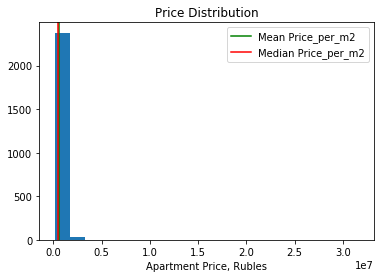

In [81]:
mean_price_per_m2 = int(data['price_per_m2'].mean())
median_price_per_m2 = int(data['price_per_m2'].median())

std = int(data['price_per_m2'].std())

min_price_per_m2 = int(data['price_per_m2'].min())
max_price_per_m2 = int(data['price_per_m2'].max())

print(f'Диапозон цен: {min_price_per_m2} - {max_price_per_m2}')
print(f'Средняя цена: {mean_price_per_m2}\nMedian price: {median_price_per_m2}')
print(f'Ст.отклонение: {std}')

plt.hist(data['price_per_m2'], bins=20)
plt.axvline(mean_price_per_m2, label='Mean Price_per_m2', color='green')
plt.axvline(median_price_per_m2, label='Median Price_per_m2', color='red')
plt.legend()
plt.xlabel('Apartment Price, Rubles')
plt.title('Price Distribution')
plt.show()

Посчитаем среднюю цену квадратного метра в каждом районе и вы ведем в таблицу с топ-10 по убыванию вместе с числом объявлений.

In [82]:
distr_m2_price = data.loc[:, ['district', 'price_per_m2']].pivot_table(index='district', values='price_per_m2', aggfunc=['count', 'mean'])
distr_m2_price.columns=['count', 'mean_per_m2']
top10_distr = distr_m2_price.sort_values(by='mean_per_m2', ascending=False).head(10)
#top10_distr['mean_per_m2'] = top10_distr['mean_per_m2']/1000
top10_distr

,count,mean_per_m2
district,,
лефортово,16,2.314950e+06
якиманка,27,1.219336e+06
хамовники,165,1.160161e+06
тверской,55,9.139760e+05
замоскворечье,36,8.993108e+05
арбат,52,8.729933e+05
басманный,39,8.113272e+05
таганский,34,7.516759e+05
пресненский,228,7.248427e+05


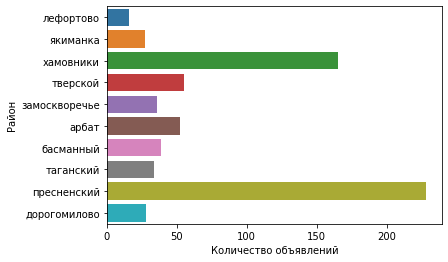

In [83]:
#диаграмма показывает в каком районе продается больше всего квартир
sns.barplot(y=top10_distr.index,x='count',data = top10_distr)
plt.xlabel('Количество объявлений')
plt.ylabel('Район')
plt.show()   

In [90]:
def summary(df):
    result = {
        'price_max': df['price'].max(),
        'price_min': df['price'].min(),
        'price_mean': df['price'].mean(),
        'price_range': df['price'].max() - df['price'].min()
    }
    return pd.Series(result).round(0)


In [91]:
data.groupby(['rooms_count']).apply(summary)

,price_max,price_min,price_mean,price_range
rooms_count,,,,
1,131280000.0,3400000.0,15578325.0,127880000.0
2,340295752.0,4500000.0,33364623.0,335795752.0
3,792210000.0,9800000.0,68221593.0,782410000.0
4,734651099.0,13327677.0,134200197.0,721323422.0
5,612209249.0,47000000.0,174620376.0,565209249.0


In [84]:
def summary_distr(df):
    result = {
        'price_max': df['price'].sum(),
        'price_min': df['price'].mean(),
        'price_mean': df['price'].mean()
        'price_range': df['price'].max() - df['price'].min()
    }
    return pd.Series(result).round(0)


In [92]:
data.groupby(['district']).apply(summary)

,price_max,price_min,price_mean,price_range
district,,,,
unknown,25000000.0,4500000.0,11799923.0,20500000.0
академический,63016961.0,11500000.0,25007116.0,51516961.0
алексеевский,91938846.0,12350000.0,35685713.0,79588846.0
алтуфьевский,12500000.0,8617200.0,11034107.0,3882800.0
арбат,225138000.0,26900000.0,103081546.0,198238000.0
аэропорт,160000000.0,13500000.0,52363462.0,146500000.0
бабушкинский,18000000.0,9300000.0,13750056.0,8700000.0
басманный,302480000.0,15694827.0,76439409.0,286785173.0
беговой,100000000.0,11590000.0,45844114.0,88410000.0
